
# <p style="text-align: center;">MIS 382N: ADVANCED PREDICTIVE MODELING - MSBA</p>
# <p style="text-align: center;">Assignment 1</p>
## <p style="text-align: center;">Total points: 85</p>
## <p style="text-align: center;">Due: Monday, September 14 submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Your partner needs to be from the same section. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTEID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group. If you do change, let the TA know. 

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

# Question 1: Challenges in Data Science (10 pts)

Refer to the Domino guide under Modules --> Additional Resources

Section 2 describes 8 Challenges. You may have personally encountered or heard of somebody else who encountered some of these challenge. If so, please write 1-2 paragraphs on what situation was encountered and how it mapped into one the mentioned challenges. If not, think of a hypothetical case and do the same exercise.

Problem: Solve the right problem too slowly for it to matter.

With financial trading becoming incrasingly fast paced with the advent of advanced machine learning algorithms and faster processing speeds the need to produce not only an accurate model, but also a efficient/fast model is imperative. Although a firm might have a highly accurate algorithm that can predict the price of securities in 1 minute but takes 30 seconds to compute, if another firm's algorithm can do the same task in 5 seconds they will take some (if not all) of the profits created by the price descrepency. Therefore, although both firms employ data scientists who create an algorithm that (fairly) accuratly predict the price of a security in the next minute, the firm that can evalute the model the fastest will win.

The same thing could be said for models that predict things people need to know within a certain time frame. Common examples are weather predictions or transportation routes (google maps). If these models take days to run, the information to the user is much less valuable since the time they needed the information has most likely passed.

# Question 2: Guess the coin (5+5 = 10 points)

Assume we are playing a guessing game with a friend. The friend has three coins at hand:
* **Coin A**: a fair coin with equal probability of being head (H ) or tail (T)
* **Coin B**: a biased coin with a probability of 0.75 being head (H)
* **Coin C**: a coin with a probability of $P^*(H)$ being head (H)

The friend secretly picked one of the coins, randomly flipped it a few times, and get a sequence of *HTHHTT* (all of which come from the same coin he picked). 

1. If you had to choose between whether **Coin A** or **Coin B** was used, and you prefer the one which is more likely, which one will you choose?  (5 points)
2. What would be the value of  $P^*(H)$ such that **Coin C** corresponds to the most likely (among infinite possible coins) coin to have produced the observed sequence?(i.e. provide  an analytical derivation for $P^*(H)$ using maximum likelihood estimation (MLE))."

## Answer

1.

To determine the most likely coin used given the observation of HTHHTT, we use the likelihood function multipled by the n choose k constant (because we are dealing with independent bernoulli trials). Taking the equation to its conclusion, we see that coin A is the more likely of the two coins.

In [117]:
import math

observations = [1,0,1,1,0,0]
n = 6
k = 3

A_prob=0.5
B_prob=0.75
n_choose_k= math.factorial(6)/(math.factorial(3)*math.factorial(3))

def max_likelihood(k,n, probability, n_choose_k):
    log_prob=k*np.log(probability)+(n-k)*np.log(1-probability)
    return n_choose_k*np.exp(log_prob)

A=max_likelihood(k,n,A_prob, n_choose_k)
B=max_likelihood(k,n,B_prob, n_choose_k)

print('The likelihood of Coin A is {}, the likelihood of Coin B is {}'.format(A,B))
print('Coin A is more likely given our observation.')

The likelihood of Coin A is 0.3125000000000001, the likelihood of Coin B is 0.1318359375000001
Coin A is more likely given our observation.


2. 

To determine find the value of P such that P*(H) corresponds to the most likely coin to have been used, we use the maximum likelihood estimation. We begin taking the probability mass function, and when we interpret the function as a function in the model parameter with fixed observations, we get the likelihood function. To find the p with the highest likelihood, we maximize the likelihood function, which takes the form of maximizing the log of the likelihood function. Maximizing a function requires setting its first derivative to 0. The derivation is as follows:

$L(P) =$ $\begin{pmatrix}
n\\
k
\end{pmatrix}$$P^k(1-P)^{n-k}$

$l(p) =$ $\begin{pmatrix}
n\\
k
\end{pmatrix}$ $\cdot k \cdot log(p) + (n-k) \cdot log(1-p)$

$l'(p) = \frac{k}{p} - \frac{n-k}{1-p}$

$p = \frac{k}{n}$

Using this derivation, you will find that P*(H) is equal to 0.5, which corresponds with Coin A our most likely used coin.

# Question 3: Multiple Linear Regression (30 pts)

This dataset is a record of 7 common different fish species in fish market sales. With this dataset, a predictive model can be developed using machine friendly data and the weight of fish can be predicted. Use the following code to import the Fish market prices dataset in python. The dataset is taken from https://www.kaggle.com/aungpyaeap/fish-market.

In [64]:
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None

dataSource = 'data (3).csv'
df = pd.read_csv(dataSource, index_col=0)
df = df[~df.isin([0, np.nan, np.inf, -np.inf]).any(1)]
df = df.fillna(0)
df.head()

,Weight,Length1,Length2,Length3,Height,Width
Species,,,,,,
Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


Here,
1. Species: Species name of fish
2. Weight: Weight of fish in gram
3. Length1: Vertical length in cm
4. Length2: Diagonal length in cm
5. Length3: Cross length in cm
6. Height: Height in cm
7. Width: Diagonal width in cm

In [65]:
df = df.fillna(0)
X = df.drop(['Weight'], axis=1)
y = df['Weight']

Consider the `Weight` column to be your target variable.

a. (2 pts)  Print the shape (number of rows and columns) of the feature matrix X, and print the first 5 rows.

b. (6 pts) Using ordinary least squares, fit a multiple linear regression (MLR) on all the feature variables using the entire dataset. Report the regression coefficient of each input feature and evaluate the model using mean absolute error (MAE). Example of ordinary least squares in Python is shown in Section 1.1.1 of http://scikit-learn.org/stable/modules/linear_model.html.

c. (6 pts) Split the data into a training set and a test set, using the train_test_split with test_size = 0.25 and random_state = 50. Fit an MLR using the training set. Evaluate the trained model using the training set and the test set, respectively. Compare the two MAE values thus obtained. Report the [$R^2$ (coefficient of determination)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html) value.

d. (5 pts) Calculate the pearson correlation matrix of the independent variables in the training set. Report the variables which have magnitude of correlation greater than 0.8 w.r.t the variable 'Length2'. Now, plot a pairplot based on Species column as seen in the 2nd plot [here](https://seaborn.pydata.org/generated/seaborn.pairplot.html). How does the pairplot validate your previous answer?

e. (6 pts) Plot the histogram of Y_train and see its distribution. Now take log of Y_train and plot its histogram. Now run regression again after taking log and compare the MAE. You need to do np.exp(predictions) to bring them back to original scale, and then calculate MAE and $R^2$. Explain the results.

f. (5 pts) Rank the features in descending order based on their significance. You might find this link to be helpful: http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html.

g. (Bonus question - 5 pts) Use the Species column for one-hot encoding and perform part c of this question. Explain your results.

## Answer

a.

In [18]:
print(X.shape)
print(X[:5])

(158, 5)
         Length1  Length2  Length3   Height   Width
Species                                            
Bream       23.2     25.4     30.0  11.5200  4.0200
Bream       24.0     26.3     31.2  12.4800  4.3056
Bream       23.9     26.5     31.1  12.3778  4.6961
Bream       26.3     29.0     33.5  12.7300  4.4555
Bream       26.5     29.0     34.0  12.4440  5.1340


b.

In [19]:
mlr = linear_model.LinearRegression()

model=mlr.fit(X,y)

y_predict = mlr.predict(X)

print(model.coef_)
mean_absolute_error(y,y_predict)

[ 63.96945622  -9.10851306 -28.11886474  27.9262076   23.41231976]


91.7123336496042

c.

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

x = X

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.75, test_size = 0.25, random_state=50)

model2=mlr.fit(x_train, y_train)

test_predict = mlr.predict(x_test)
test_predict2 = mlr.predict(x_train)

print(model2.coef_)
print('')
print("The MAE of the test predictions is {}".format(mean_absolute_error(y_test,test_predict)))
print("The R2 of the test predictions is {}".format(r2_score(y_test,test_predict)))
print('')
print("The MAE of the training predictions is {}".format(mean_absolute_error(y_train, test_predict2)))
print("The R2 of the training predictions is {}".format(r2_score(y_train,test_predict2)))

[ 32.30007274  23.72291951 -32.07981024  29.58677629  25.34986491]

The MAE of the test predictions is 97.81799831813107
The R2 of the test predictions is 0.8990516531635935

The MAE of the training predictions is 86.08384309504524
The R2 of the training predictions is 0.8749867938140782


d.

Weight     0.918603
Length1    0.999516
Length3    0.994083
Width      0.873201
dtype: float64


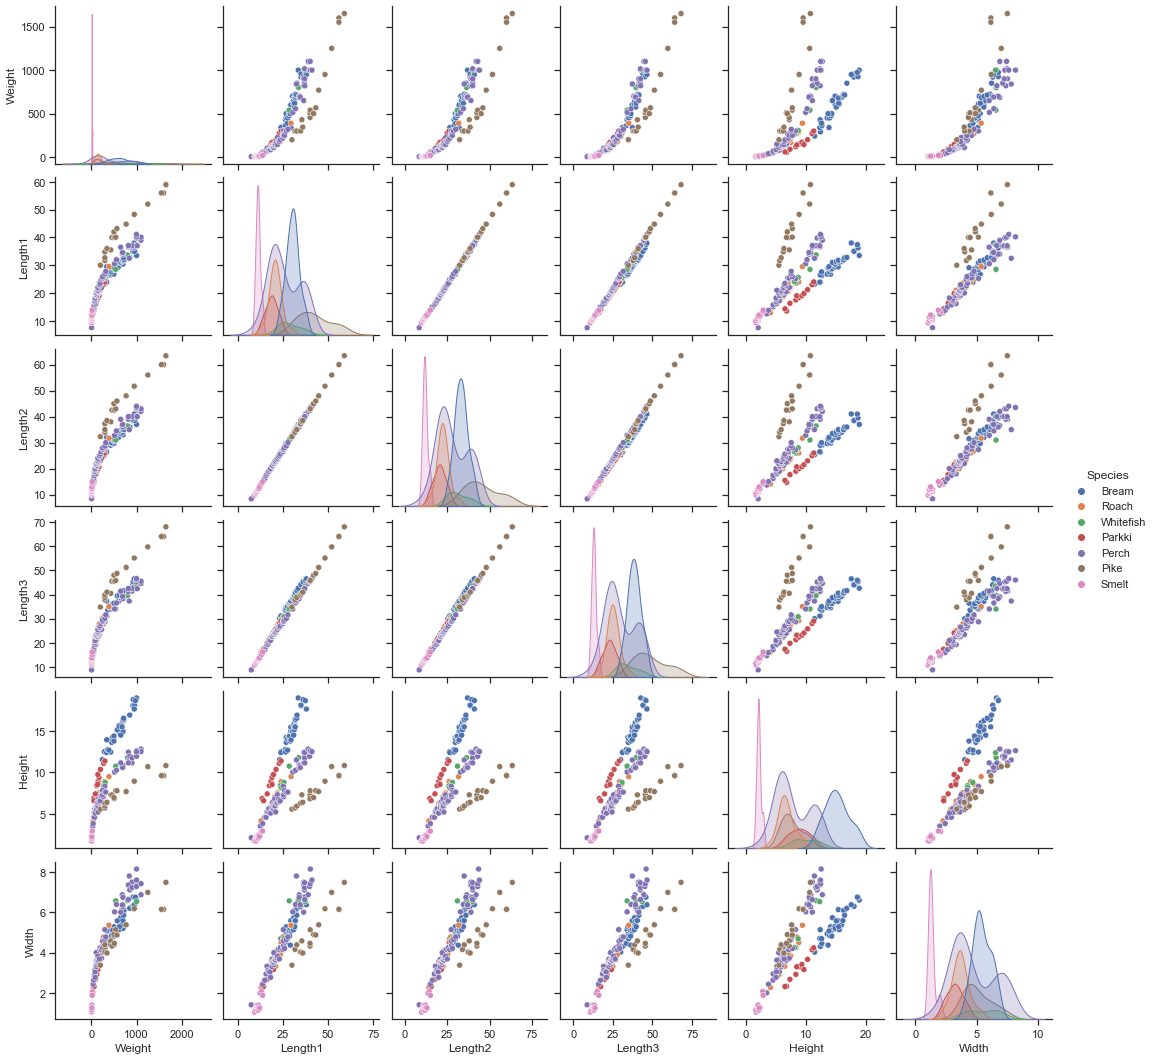

In [25]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)
from scipy.stats.stats import pearsonr

x_corr = df.drop(['Length2'], axis=1)
y_corr = df['Length2']
pearson_matrix = x_corr.corrwith(y_corr, method='pearson')
#pearson_matrix = X.corr(method='pearson')
print(pearson_matrix[pearson_matrix > 0.8])

df1 = df.reset_index()
g = sns.pairplot(df1, hue='Species')
print(g)

e.

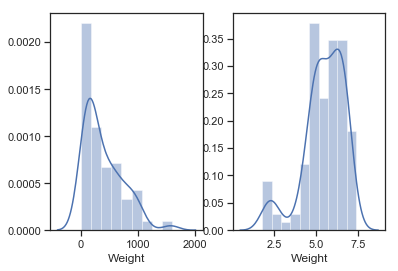

In [22]:
from matplotlib import pyplot as plt
fig, axs = plt.subplots(ncols=2)

sns.distplot(y_train, ax=axs[0])
sns.distplot(np.log(y_train), ax=axs[1])

In [78]:
model3=mlr.fit(x_train, np.log10(y_train))

test_predict = mlr.predict(x_test)
scaled_predict = np.exp(test_predict)

print("The coefficients for the model after logging Y are:\nLength1: {}\nLength2: {}\nLength3: {}\nHeight: {}\nWidth: {}\n".format(model3.coef_[0], model3.coef_[1], model3.coef_[2], model3.coef_[3], model3.coef_[4]))
print("The Mean Absolute Error of the model after logging Y is {}".format(mean_absolute_error(y_test,scaled_predict)))
print("The R2 of the model after logging Y is {}".format(r2_score(y_test,scaled_predict)))

The coefficients for the model after logging Y are:
Length1: -0.12133861202371744
Length2: 0.11630755828651787
Length3: 0.019281801569139678
Height: 0.015357880638021558
Width: 0.14503785754648096

The Mean Absolute Error of the model after logging Y is 406.8928303744094
The R2 of the model after logging Y is -0.9583327121083924


f.

In [86]:
from sklearn.feature_selection import RFE
#from sklearn.svm import SVR
estimator = linear_model.LinearRegression()
selector = RFE(estimator, n_features_to_select=1, step=1)
selector = selector.fit(X, y)
ranking = selector.ranking_
ranking

print(ranking)
print("")
print("The ranking of the variables in terms of descending significance:\n\
5. {}\n\
4. {}\n\
3. {}\n\
2. {}\n\
1. {}".format('Length3', 'Length2', 'Length1', 'Height', 'Width'))

[3 4 5 2 1]

The ranking of the variables in terms of descending significance:
5. Length3
4. Length2
3. Length1
2. Height
1. Width


g.

In [107]:
from numpy import asarray
from sklearn.preprocessing import OneHotEncoder
# define data
species = df1['Species'].unique()
species_2d = [[x] for x in species]
#print(species)
data = asarray(species_2d)
print(data)
# define one hot encoding
encoder = OneHotEncoder(sparse=False)
# transform data
onehot = encoder.fit_transform(data)
print(onehot)



for x in species:
    if x == 'Bream':
        df[x] = data[:,0]
    elif x == 'Roach':
        df[x] = data[:,1]
    elif x == 'Whitefish':
        df[x] = data[:,2]
    elif x == 'Parkki':
        df[x] = data[1]
    elif x == 'Roach':
        df[x] = data[1]
    elif x == 'Roach':
        df[x] = data[1]

[['Bream']
 ['Roach']
 ['Whitefish']
 ['Parkki']
 ['Perch']
 ['Pike']
 ['Smelt']]
[[1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]]


# Question 4 (30 pts)

Using the same data from the previous question, in this question you will explore the application of Lasso and Ridge regression using sklearn package in Python. Use the same train and test data with additional augmented columns from before. Scale the data so that each of the independent variables have zero mean and unit variance. You can use the [sklearn.preprocessing.scale](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html) function for this.

    from sklearn.linear_model import LinearRegression, Lasso, Ridge, RidgeCV, LassoCV

1) Use sklearn.linear_model.Lasso and sklearn.linear_model.Ridge classes to do a [5-fold cross validation](http://scikit-learn.org/stable/auto_examples/exercises/plot_cv_diabetes.html#example-exercises-plot-cv-diabetes-py) using sklearn's [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html). For the sweep of the regularization parameter, we will look at a grid of values ranging from $\lambda = 10^{10}$ to $\lambda = 10^{-2}$. In Python, you can consider this range of values as follows:

      import numpy as np

      alphas =  10**np.linspace(10,-2,100)*0.5

  Report the best chosen $\lambda$ based on cross validation. The cross validation should happen on your training data using  average MAE as the scoring metric. (8pts)

2) Run ridge and lasso for all of the alphas specified above (on training data), and plot the coefficients learned for each of them - there should be one plot each for lasso and ridge, so a total of two plots; the plots for different features for a method should be on the same plot. What do you qualitatively observe when value of the regularization parameter is changed? (7pts)

3) Run least squares regression, ridge, and lasso on the training data. For ridge and lasso, use only the best regularization parameter. Report the prediction error (MAE) on the test data for each. (5pts)

4) Run lasso again with cross validation using [sklearn.linear_model.LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html). Set the cross validation parameters as follows:

    LassoCV(alphas=None, cv=10, max_iter=10000)

Report the best $\lambda$ based on cross validation. Run lasso on the training data using the best $\lambda$ and report the coefficeints for all variables. (5pts)

5) Why did we have to scale the data before regularization? (5pts)

## Answer

In [2]:
import warnings; warnings.simplefilter('ignore')
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Load and Clean Data
dataSource = 'data.csv'
df = pd.read_csv(dataSource, index_col=0)
df = df[~df.isin([0, np.nan, np.inf, -np.inf]).any(1)]
df = df.fillna(0)

# Scale Data (0,1)
#df_scaled = pd.DataFrame(preprocessing.scale(df, axis=1), columns=df.columns)
X = df.drop(['Weight'], axis=1)
X = pd.DataFrame(preprocessing.scale(X, axis=1), columns=X.columns)
y = df['Weight']
#y = pd.DataFrame(preprocessing.scale(y), columns=['Weight'])

# Split Data into Testing and Training
X_train, X_test = train_test_split(X, test_size=0.25, shuffle = True, random_state=50)
y_train, y_test = train_test_split(y, test_size=0.25, shuffle = True, random_state=50)

1.

In [3]:
#from sklearn import preprocessing
#import pandas as pd

# Load and Normalize Data
#df = pd.read_csv("data.csv", index_col=0)
#df = df[~df.isin([0, np.nan, np.inf, -np.inf]).any(1)]
#df = df.fillna(0)

# Scale Data (0,1)
#df_scaled = pd.DataFrame(preprocessing.scale(df, axis=0), columns=df.columns)
#X = df_scaled.drop(['Weight'], axis=1)
#y = df_scaled['Weight']

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold

lasso = Lasso(random_state=50, max_iter=100000)
alphas = 10**np.linspace(10,-2,100)*0.5

tuned_parameters = [{'alpha': alphas}]
n_folds = 5
k_fold = KFold(n_folds, shuffle = True, random_state=50)

lasso_regressor = GridSearchCV(lasso, tuned_parameters, cv=k_fold, refit=True, scoring = 'neg_mean_absolute_error')
lasso_regressor.fit(X_train, y_train)

print(lasso_regressor.best_params_)

{'alpha': 0.0466301673441609}


In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

Ridge = Ridge(random_state=50, max_iter=100000)
alphas = 10**np.linspace(10,-2,100)*0.5

tuned_parameters = [{'alpha': alphas}]
n_folds = 5
k_fold = KFold(n_folds, shuffle = True, random_state=50)

Ridge_regressor = GridSearchCV(Ridge, tuned_parameters, cv=k_fold, refit=True, scoring = 'neg_mean_absolute_error')
Ridge_regressor.fit(X_train, y_train)

print(Ridge_regressor.best_params_)

{'alpha': 0.005}


2.

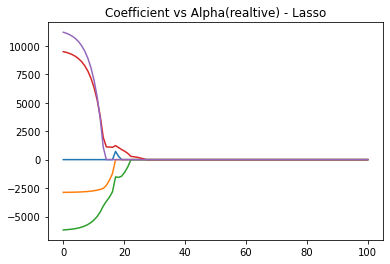

In [13]:
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt


#alphas = 10**np.linspace(10,-2,100)*0.5
alphas = 10**np.linspace(-2,10,100)*0.5

results = {}
length1_weights = []
length2_weights = []
length3_weights = []
height_weights = []
width_weights = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha, random_state=50, max_iter=100000)
    lasso.fit(X_train, y_train)
    length1_weights.append(lasso.coef_[0])
    length2_weights.append(lasso.coef_[1])
    length3_weights.append(lasso.coef_[2])
    height_weights.append(lasso.coef_[3])
    width_weights.append(lasso.coef_[4])

alphas = np.linspace(0,len(length1_weights),len(length1_weights))
plt.plot(alphas, length1_weights)
plt.plot(alphas, length2_weights)
plt.plot(alphas, length3_weights)
plt.plot(alphas, height_weights)
plt.plot(alphas, width_weights)
plt.title('Coefficient vs Alpha(realtive) - Lasso')
plt.show()

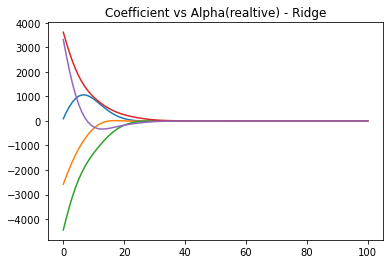

In [14]:
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt


#alphas = 10**np.linspace(10,-2,100)*0.5
alphas = 10**np.linspace(-2,10,100)*0.5

results = {}
length1_weights = []
length2_weights = []
length3_weights = []
height_weights = []
width_weights = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha, random_state=0, max_iter=100000)
    ridge.fit(X_train, y_train)
    length1_weights.append(ridge.coef_[0])
    length2_weights.append(ridge.coef_[1])
    length3_weights.append(ridge.coef_[2])
    height_weights.append(ridge.coef_[3])
    width_weights.append(ridge.coef_[4])

alphas = np.linspace(0,len(length1_weights),len(length1_weights))
plt.plot(alphas, length1_weights)
plt.plot(alphas, length2_weights)
plt.plot(alphas, length3_weights)
plt.plot(alphas, height_weights)
plt.plot(alphas, width_weights)
plt.title('Coefficient vs Alpha(realtive) - Ridge')
plt.show()

3.

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

lr = LinearRegression()
lr.fit(X_train, y_train)

pred_test_lr = lr.predict(X_test)
print(mean_absolute_error(y_test, pred_test_lr))

306.26529661016946


In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

lasso = Lasso(random_state=50, max_iter=100000)
alphas = 10**np.linspace(10,-2,100)*0.5

tuned_parameters = [{'alpha': alphas}]
n_folds = 5
k_fold = KFold(n_folds, shuffle = True, random_state=50)

lasso_regressor = GridSearchCV(lasso, tuned_parameters, cv=k_fold, refit=True, scoring = 'neg_mean_absolute_error')
lasso_regressor.fit(X_train, y_train)

lasso = Lasso(alpha=lasso_regressor.best_params_['alpha'], random_state=50, max_iter=100000)
lasso.fit(X_train, y_train)
pred_test_lasso = lasso.predict(X_test)
print(mean_absolute_error(y_test, pred_test_lasso))

306.1109759833363


In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

ridge = Ridge(random_state=50, max_iter=100000)
alphas = 10**np.linspace(10,-2,100)*0.5

tuned_parameters = [{'alpha': alphas}]
n_folds = 5
k_fold = KFold(n_folds, shuffle = True, random_state=50)

Ridge_regressor = GridSearchCV(ridge, tuned_parameters, cv=k_fold, refit=True, scoring = 'neg_mean_absolute_error')
Ridge_regressor.fit(X_train, y_train)

ridge = Ridge(alpha=lasso_regressor.best_params_['alpha'], random_state=50, max_iter=100000)
ridge.fit(X_train, y_train)
pred_test_ridge = ridge.predict(X_test)
print(mean_absolute_error(y_test, pred_test_ridge))

311.3701888507714


4.

In [35]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import KFold

n_folds = 10
k_fold = KFold(n_folds)

lasso_cv = LassoCV(alphas=None, cv=k_fold, max_iter=100000)
lasso_cv.fit(X_train, y_train)
print(lasso_cv.alpha_)

lasso = Lasso(alpha=lasso_cv.alpha_, random_state=50, max_iter=100000)
lasso.fit(X_train, y_train)
pred_test_lasso = lasso.predict(X_test)
print(mean_absolute_error(y_test, pred_test_lasso))
# print(lasso.coef_)
for i,x in enumerate(list(X_train)):
    print(x, lasso.coef_[i])

0.008669540538066943
306.28688652452695
[   -0.         -2869.01262507 -6133.72352006  9335.45583058
 10988.85489453]
Length1 -0.0
Length2 -2869.0126250723383
Length3 -6133.723520060947
Height 9335.455830583658
Width 10988.854894533571


5.

The penalty term for lasso penalizes adding parameters based on the absolute value of the magnitude of coefficients. Thus, if we don't scale and some feature has very large numbers (resulting in large coefficients) and another has small numbers (resulting in small coefficients) then lasso would be biased to dropping the large magnitutde features. By scaling first we eliminate this bias and avoid misleading results when using Lasso or Ridge.

Extra (I liked the example code so kept it for future reference):

Answer to the bonus question: how much can you trust the selection of alpha?

Alpha parameters maximising the generalization score on different
subsets of the data:
[fold 0] alpha: 0.00874, score: 0.77998
[fold 1] alpha: 0.00874, score: 0.91753
[fold 2] alpha: 0.00874, score: -0.28244
[fold 3] alpha: 0.00500, score: 0.79625
[fold 4] alpha: 0.00500, score: 0.73326

Answer: Not very much since we obtained different alphas for different
subsets of the data and moreover, the scores for these alphas differ
quite substantially.


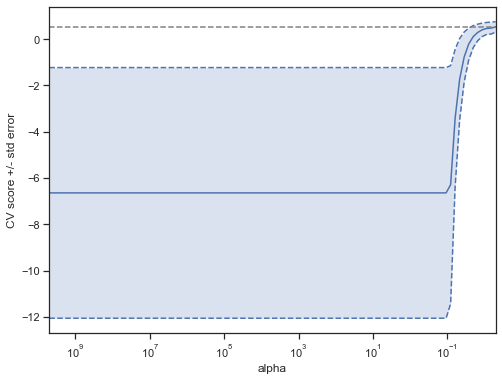

In [41]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

lasso = Lasso(random_state=0, max_iter=100000, normalize=True)
alphas = 10**np.linspace(10,-2,100)*0.5

tuned_parameters = [{'alpha': alphas}]
n_folds = 5

clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=False)
clf.fit(X, y)
scores = clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']
plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores)

# plot error lines showing +/- std. errors of the scores
std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(alphas, scores + std_error, 'b--')
plt.semilogx(alphas, scores - std_error, 'b--')

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel('CV score +/- std error')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim([alphas[0], alphas[-1]])

# #############################################################################
# Bonus: how much can you trust the selection of alpha?

# To answer this question we use the LassoCV object that sets its alpha
# parameter automatically from the data by internal cross-validation (i.e. it
# performs cross-validation on the training data it receives).
# We use external cross-validation to see how much the automatically obtained
# alphas differ across different cross-validation folds.
lasso_cv = LassoCV(alphas=alphas, random_state=0, max_iter=100000)
k_fold = KFold(5)

print("Answer to the bonus question:",
      "how much can you trust the selection of alpha?")
print()
print("Alpha parameters maximising the generalization score on different")
print("subsets of the data:")
for k, (train, test) in enumerate(k_fold.split(X, y)):
    lasso_cv.fit(X.iloc[train], y.iloc[train])
    print("[fold {0}] alpha: {1:.5f}, score: {2:.5f}".
          format(k, lasso_cv.alpha_, lasso_cv.score(X.iloc[test], y.iloc[test])))
print()
print("Answer: Not very much since we obtained different alphas for different")
print("subsets of the data and moreover, the scores for these alphas differ")
print("quite substantially.")

plt.show()

# Question 5 (5 pts)

Lasso and ridge regularization techniques are often used to combat overfitting during linear regression. Which of the two yields more sparse models (i.e. fewer number of parameters) when the tuning parameter $\lambda$ is sufficiently large (but not infinite)?

## Answer

While both the ridge and lasso techniques seek to shrink parameter coefficients, only lasso employs parameter selection. That means that using ridge regularization will result in either using all parameters or none. Lasso on the other hand may eliminate some of the parameters if they are deemed insiginificant to the model. So in that sense, lasso is more likely to yield a sparse model when the tuning parameter is sufficiently large.